# Manifold Learning

Unsupervised PCA implements dimensionality reduction in a linear manner, i.e using orthogonality. If the space this basis exists in is curved for example, while imbedded in a higher dimensionality then PCA might miss the orthogonality all together. Manifold learning aims to learn about any manifold regardless of their 'shape' in any space.

Linear manifolds can easily be reduced in dimension by simple projection, given that its perturbance in any higher dimension is sufficiently small. Non linear Manifolds, that has significant higher order perturbances, requires a different approach. 

## Linear Embeddings and MDS

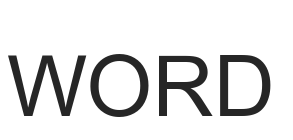

In [48]:
#first things first, generating a 2D dataset and linearly transforming it into 3D.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mplt

save_path = '../Data/WORD.png'

#make some recognisable data-points, such as a word.
fig, ax = plt.subplots(figsize=(5,2))
ax.axis('off')
ax.set(xticks=[], yticks = [])
ax.text(0,0,'WORD',size = 85)
fig.savefig(save_path)
plt.show()

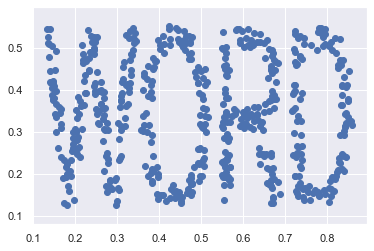

In [65]:
N=1000
from matplotlib.image import imread
data = imread('../Data/WORD.png')[::-1, :, 1].T #Here we reduce the dimension from 3 to 2
rng = np.random.RandomState()
X = rng.rand(5*N, 2) #generate a list of random numbers
i, j = (X * data.shape).astype(int).T #generate a list of random positions to test
mask = (data[i,j] < 1) #check if at the random position generated before is part of the image.
X = X[mask] #remove positions that are not part of the image
X[np.argsort(X[:, 0])] #sort the data by x

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

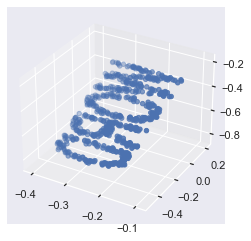

In [72]:
C = np.random.rand(3,3) #create a 3x3 matrix
e, V = np.linalg.eigh(np.dot(C, C.T)) #find real eigenvectors in 3D
X3 = np.dot(X, V[:2]) #extend the dimension of X

from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2]);

Using mds to reduce the dimension of the above data. Note that a similar result can be achieved with PCA. The difference in the methods is explained by what is conserved during the transformation.

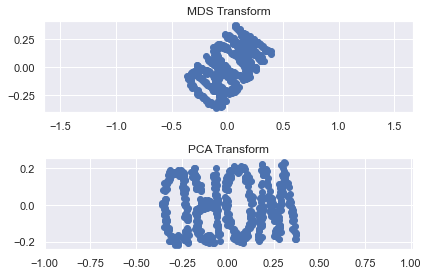

In [80]:
from sklearn.manifold import MDS
from sklearn.decomposition import PCA

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)

pca = PCA(n_components=2)
out = pca.fit_transform(X3)

fig, ax = plt.subplots(2)
ax[0].scatter(out3[:, 0], out3[:, 1])
ax[0].axis('equal')
ax[0].set(title = 'MDS Transform')
ax[1].scatter(out[:, 0], out[:, 1])
ax[1].axis('equal')
ax[1].set(title = 'PCA Transform')
fig.tight_layout()
plt.show()

## Nonlinear embeddings

Embeddings where the manifold is not linear. For example if the embedding curves in on itself.

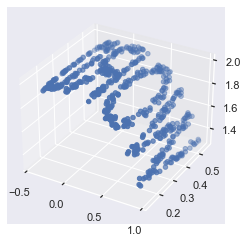

In [81]:
t = (X[:, 0] - 2) * 0.75 * np.pi
x = np.sin(t)
y = X[:, 1]
z = np.sign(t) * (np.cos(t) - 1)
out2 = np.vstack((x, y, z)).T

ax = plt.axes(projection='3d')
ax.scatter3D(out2[:, 0], out2[:, 1], out2[:, 2]);

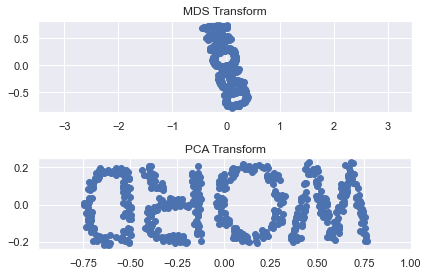

In [82]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(out2)

pca = PCA(n_components=2)
out = pca.fit_transform(out2)

fig, ax = plt.subplots(2)
ax[0].scatter(out3[:, 0], out3[:, 1])
ax[0].axis('equal')
ax[0].set(title = 'MDS Transform')
ax[1].scatter(out[:, 0], out[:, 1])
ax[1].axis('equal')
ax[1].set(title = 'PCA Transform')
fig.tight_layout()
plt.show()